In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.lda import LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Step 1: Load and preprocess Data

In [2]:
# Load Data
news_data = pd.read_csv("combined_news_data.csv", parse_dates=[1])
stock_data = pd.read_csv("DJIA_table.csv", parse_dates=[0])

In [3]:
# Check the shape and top 5 rows of news_data
print(news_data.shape)
news_data.head()

(1989, 34)


,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Para,Subjectivity,Objectivity,Positive,Neutral,Negative
0,0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",75.000000,25.000000,18.750000,25.000000,56.250000
1,1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,83.333333,16.666667,41.666667,16.666667,41.666667
2,2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...,56.250000,43.750000,18.750000,43.750000,37.500000
3,3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...,38.461538,61.538462,15.384615,61.538462,23.076923
4,4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,b'All the experts admit that we should legalis...,45.454545,54.545455,36.363636,54.545455,9.090909


In [4]:
# Create a dataframe by merging the headlines and the stock prices dataframe
merged_df = news_data[['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']].merge(stock_data, how='inner', on='Date', left_index=True)
# Check the shape and top 5 rows of the merged dataframe
print(merged_df.shape)
merged_df.head()

(1989, 13)


,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,83.333333,16.666667,41.666667,41.666667,16.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,56.250000,43.750000,18.750000,37.500000,43.750000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [5]:
# Change the NaN values to the mean value of that column
nan_list = ['Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']
for col in nan_list:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

## Step 2: Correlation Analysis
We will plot a heat map to see the correlation of the columns with each other and to see if there are any dependant variables or if any of the variables are highly correlated. 

Some variables Subjectivity, Objectivity are negatively correlated. Obviously, stock prices (i.e. open, high, low, close, adj close) are positively correlated. Other than that, there are very few variables which seem to have a very high correlation. Thus, at this point we can conclude that we do not need any sort of dimensionality reduction technique to be applied.

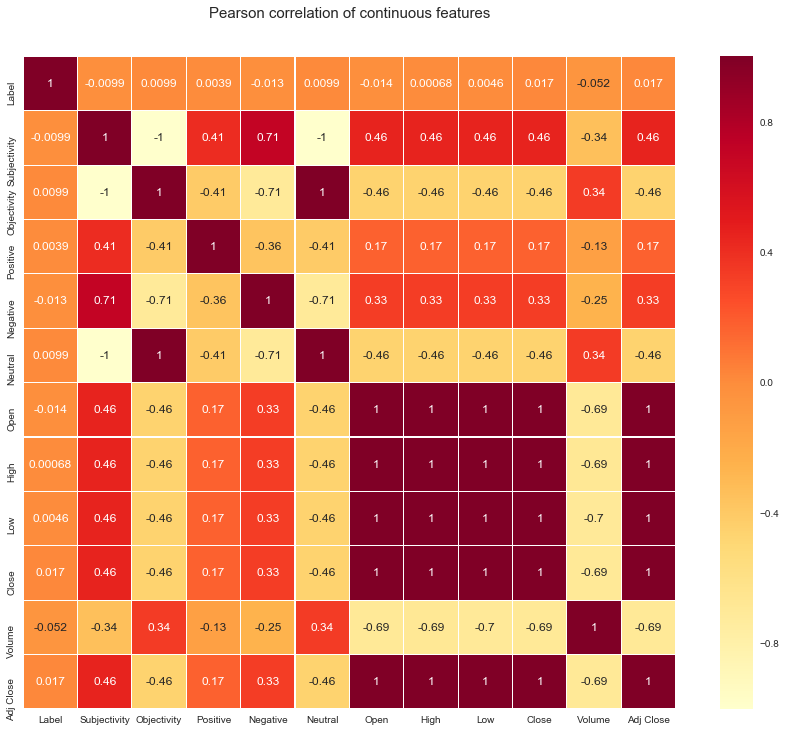

In [6]:
colormap = "YlOrRd"#pyplot.cm.hot
pyplot.figure(figsize=(16,12))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(merged_df.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
pyplot.show();

## Step 3: Train and test model

In [7]:
# Separate the megered_df for input(X) and output variables(y)
X = np.array(merged_df.loc[:,'Positive':'Adj Close'])
y = np.array(merged_df.loc[:,'Label'])

# split into train, test and validation 80% 10% 10%
# As this is a time series, it is important we do not randomly pick training and testing samples. 
n = len(X)
train_idx = int(n*.8)
test_idx = int(n*.9)
    
X_train = X[:train_idx,:]
y_train = y[:train_idx]
    
X_test = X[train_idx:test_idx,:]
y_test = y[train_idx:test_idx]

X_valid = X[test_idx:,:]
y_valid = y[test_idx:]

In [8]:
# Append the models to the models list
models = []
models.append(('RF' , RandomForestClassifier(n_estimators=100)))
models.append(('SVC' , LinearSVC()))
models.append(('NuSVC' , NuSVC()))
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LDA()))

In [11]:
# test models
training_errors = []
validation_errors = []
accuracy = []
names = []
n_groups = len(models)

for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    train_error = sum(y_test!=y_pred)/len(y_test)
    training_errors.append(train_error)

    pred_valid = model.predict(X_valid)
    valid_error = sum(np.array(y_valid)!=np.array(pred_valid))/len(y_valid)
    validation_errors.append(valid_error)
    accu_score = accuracy_score(y_test, y_pred)
    accuracy.append(accu_score)
    names.append(name)

C:\Users\lxmxl\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


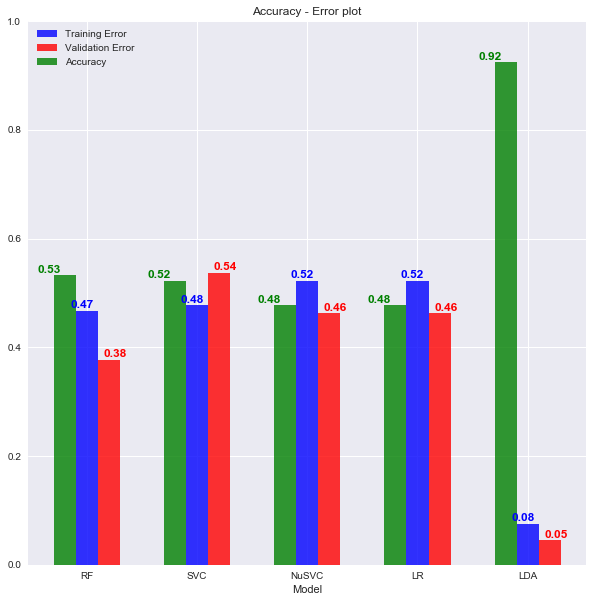

In [12]:
# plot
plt.figure(figsize=(10,10))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index + bar_width, training_errors, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Training Error')

rects2 = plt.bar(index + 2*bar_width, validation_errors, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Validation Error')

rects3 = plt.bar(index, accuracy, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Accuracy')

#labels
for i, v in enumerate(validation_errors):
    plt.text(index[i]+.35, v+.005, str(round(v,2)), color='red', fontweight='bold')
for i, v in enumerate(training_errors):
    plt.text(index[i]+.05, v+.005, str(round(v,2)), color='blue', fontweight='bold')
for i, v in enumerate(accuracy):
    plt.text(index[i]-.25, v+.005, str(round(v,2)), color='green', fontweight='bold')

plt.xlabel('Model')
plt.ylim(0,1)
plt.xticks(index + bar_width, names)
plt.legend()
plt.title("Accuracy - Error plot")

plt.show();